In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
from matplotlib.pyplot import cm
from tqdm import tqdm_notebook

In [64]:
from utils import filter_data, descript_stats, aa_distrib_plotter, hist_logdc_plot, ttplot

In [65]:
dfvz = pd.read_csv('../DataFiles/experimental_data_set.csv', engine='c', index_col=0)
filtered_indices = filter_data(dfvz)
# Removes all Samples Containing C and PXXX where X2 != P
dfvz_filtered = dfvz.loc[filtered_indices]
dfvz_filtered.sort_values(inplace=True, by=['log.label'])
dfvz_compact = dfvz_filtered.loc[:, ['seq', 'log.label']]

Original Data Set Samples: 67278        
Samples Containing Cystiene Residues: 2740        
Samples Containing Proline (But Not Proline-Proline) 4328        
Total Samples that satisfy either condition (Some Overlap) 6846        
Final Samples Used: 60432        
Percentage Removed: 89.82%


In [66]:
top_1000 = dfvz_compact.iloc[-1000:]
bottom_1000 = dfvz_compact.iloc[:1000]
top_1000.sort_values(inplace=True, by=['log.label'], ascending=False)
bottom_1000.sort_values(inplace=True, by=['log.label'], ascending=False)
# bottom_100.to_csv('csv_files_explore/bottom_1000.csv')
# top_100.to_csv('csv_files_explore/top_1000.csv')

In [67]:
dfvz_lowest_anamoly_unfiltered = dfvz[dfvz['log.label'] < -4.3]

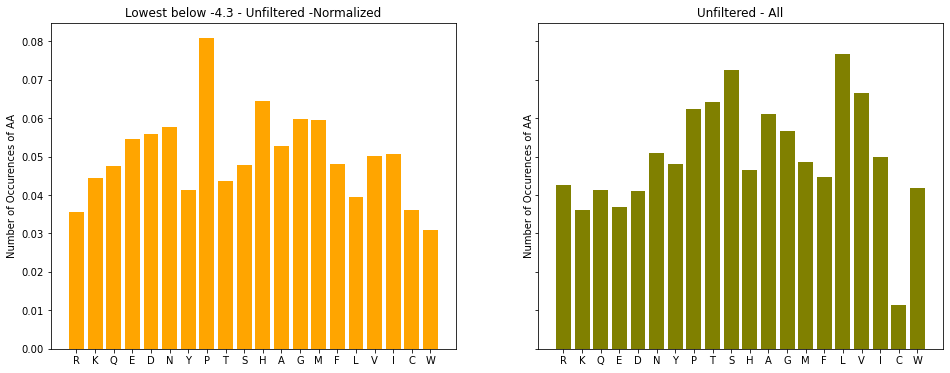

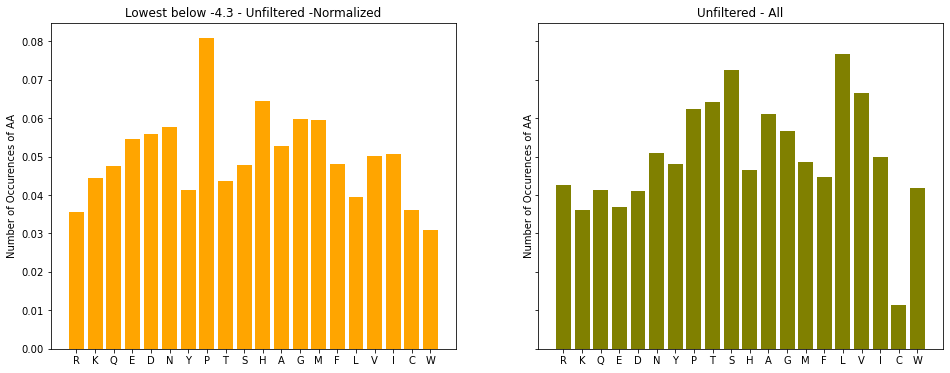

In [68]:
aa_distrib_plotter([dfvz_lowest_anamoly_unfiltered, dfvz], ['Lowest below -4.3 - Unfiltered -Normalized', 'Unfiltered - All'], normalize=True)

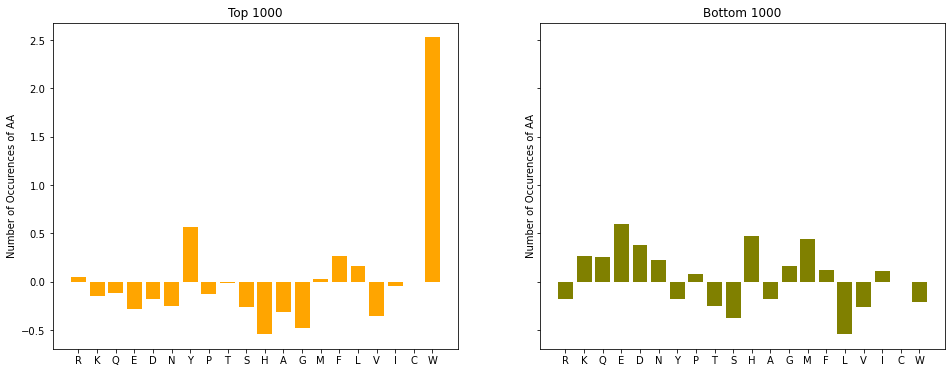

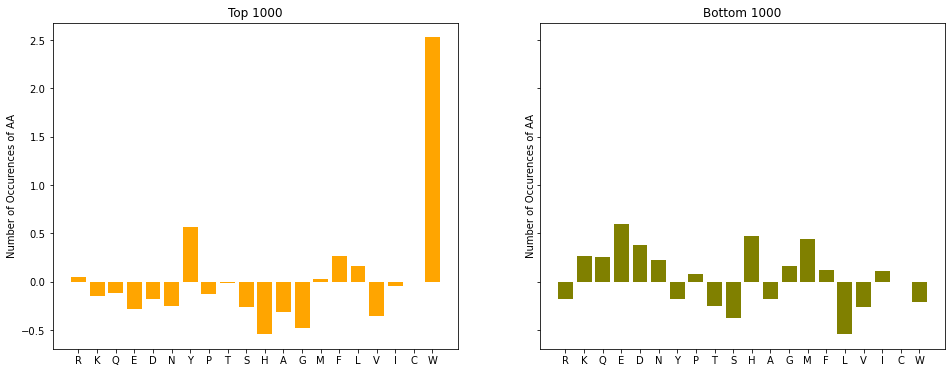

In [69]:
aa_distrib_plotter([top_1000, bottom_1000], ['Top 1000', 'Bottom 1000'],  normalize_base=True,base_df=dfvz_filtered)

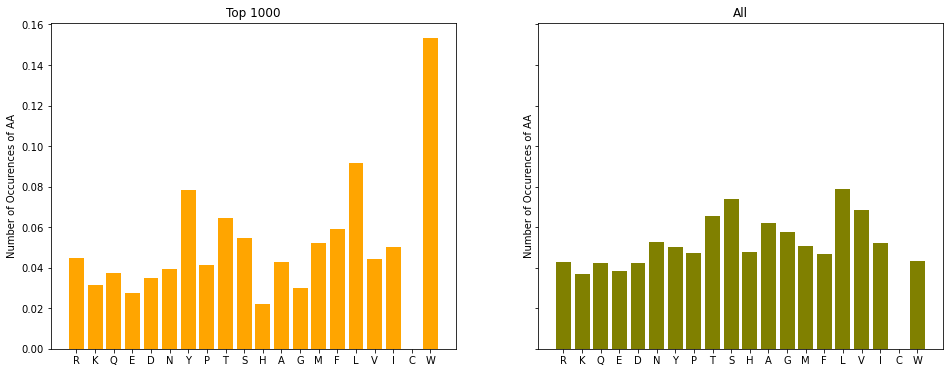

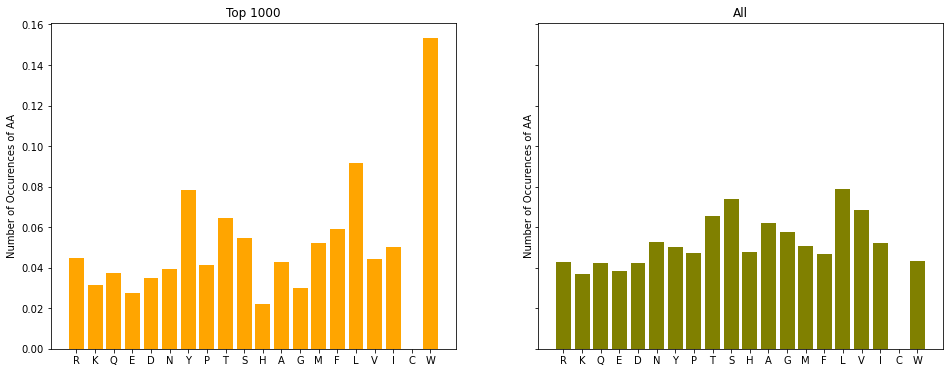

In [70]:
aa_distrib_plotter([top_1000, dfvz_filtered], ['Top 1000', 'All'], normalize=True)

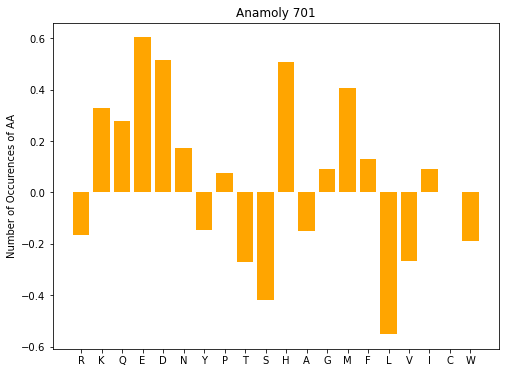

In [103]:
anamoly_701 = dfvz_filtered[dfvz_filtered['log.label'] == -4.439897] 
anamoly_701_aa_distrib = aa_distrib_plotter([anamoly_701], ['Anamoly 701 - Normalized'],  normalize_base=True,base_df=dfvz_filtered)


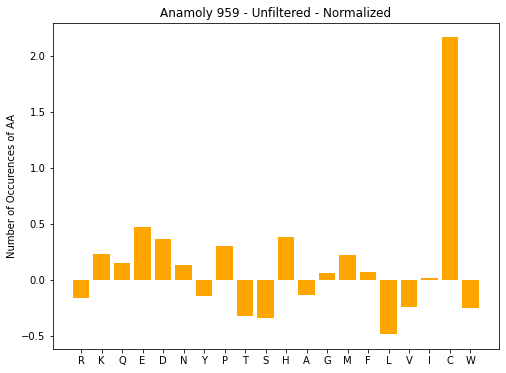

In [105]:
anamooly_959_unfiltered = dfvz[dfvz['log.label'] == -4.439897]
anamooly_959_unfiltered_aa_distrib = aa_distrib_plotter([anamooly_959_unfiltered], ['Anamoly 959 - Unfiltered - Normalized'],  normalize_base=True,base_df=dfvz)
anamooly_959_unfiltered_aa_distrib.savefig('anamooly_959_unfiltered_aa_distrib.png')

In [73]:
from twenty_by_twenty_plot import ttplot

In [74]:
greater_4 = dfvz[dfvz['log.label'] > -4.0]

In [75]:
# plot_save = ttplot(greater_4['seq'].values, greater_4['log.label'].values, ['PPAT'])

In [76]:
# plot_save.savefig('20x20-masked-un-filtered-4.png')

In [77]:
# plot_save_no_filter = ttplot(dfvz_filtered['seq'].values, dfvz_filtered['log.label'].values, [])

In [78]:
# plot_save_no_filter.savefig('20x20-masked-not-filtered.png')

In [79]:
from graphing import hist_logdc_plot

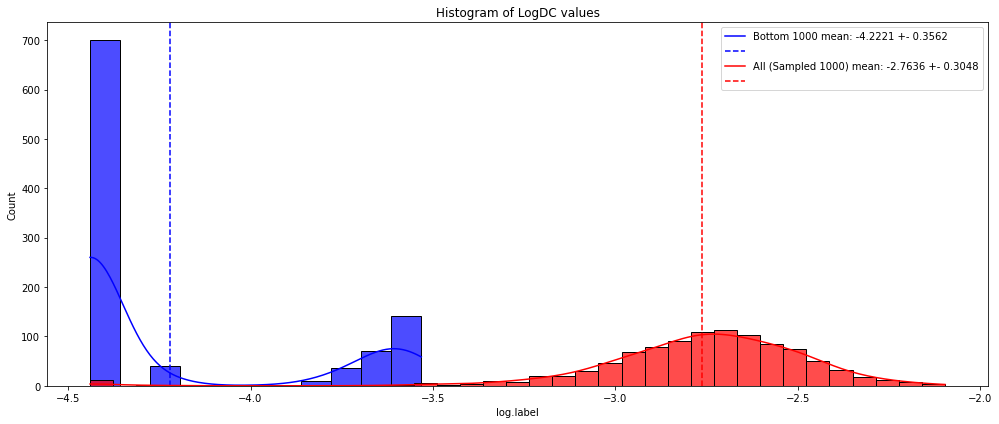

In [80]:
fig1 = hist_logdc_plot([bottom_1000,dfvz_filtered.sample(1000)], ['Bottom 1000','All (Sampled 1000)'])

In [81]:
df_containing_p = dfvz_compact[dfvz_compact['seq'].str.contains('P')]
df_starting_p = dfvz_compact[dfvz_compact['seq'].str.startswith('P')]

In [82]:
df_starting_p

,seq,log.label
66951,PPEQ,-4.439897
66279,PPEG,-4.439897
61928,PPFF,-3.597369
30834,PPVI,-3.596039
43067,PPKI,-3.568775
...,...,...
3759,PPQV,-2.556839
58985,PPIH,-2.543236
15732,PPNV,-2.540074
1265,PPYS,-2.538892


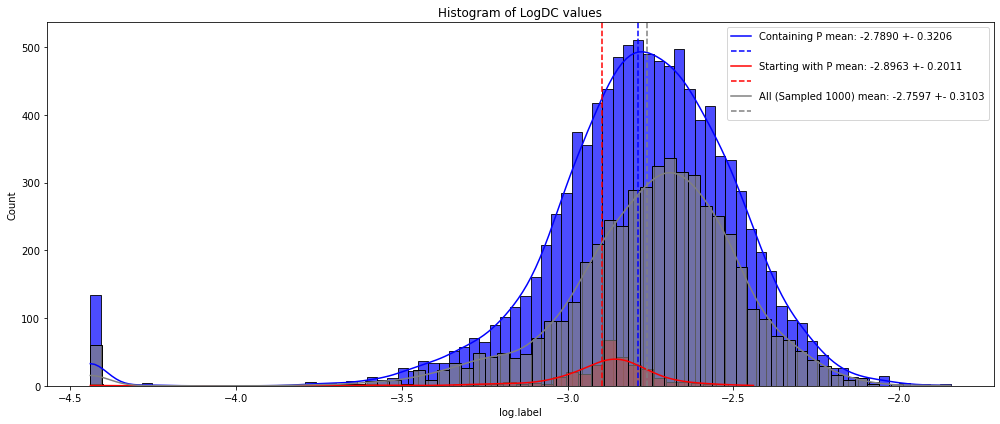

In [83]:
fig1 = hist_logdc_plot([df_containing_p,df_starting_p,dfvz_compact.sample(5000)], ['Containing P','Starting with P','All (Sampled 1000)'])

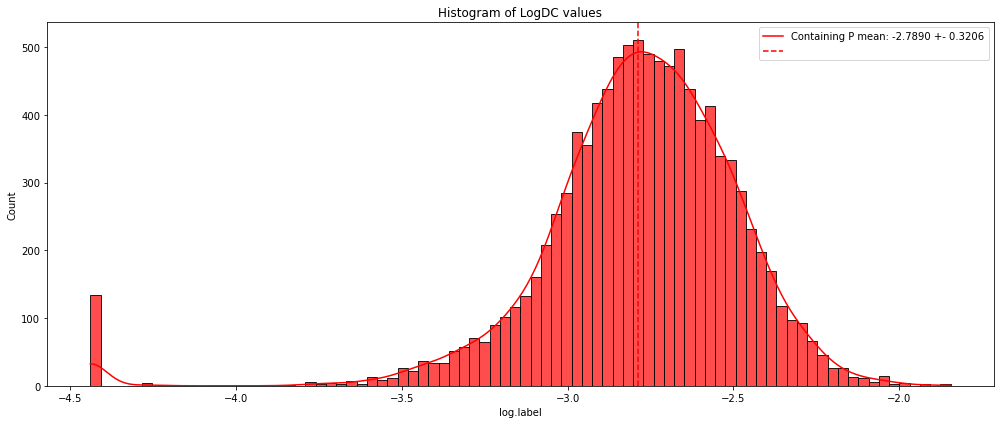

In [106]:
fig_p_contains = hist_logdc_plot([df_containing_p], ['Containing P'], colors=['red'])
fig_p_contains.savefig('p_contains_hist.png')

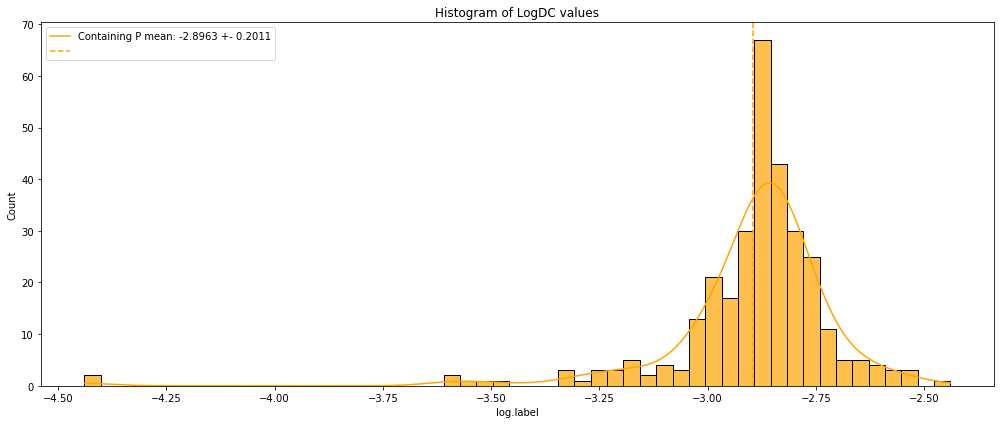

In [85]:
fig_starts_with_p = hist_logdc_plot([df_starting_p], ['Containing P'], colors=['orange'])
fig_starts_with_p.savefig('p_starts_with_hist.png')

In [86]:
df_starting_p.to_csv('df_starting_p.csv')
df_containing_p.to_csv('df_containing_p.csv')

In [87]:
anamoly_700[anamoly_700['seq'].str.contains('P')]

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
66482,GFLP,0.000036,-4.439897,2.23,-5.36,0.30,-4.92,1.30,0.45,-4.19,...,0.08,-0.62,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66488,KPHI,0.000036,-4.439897,2.84,1.41,-3.14,-1.22,0.88,2.23,2.41,...,0.93,0.65,1.27,-0.14,0.30,-1.80,0.30,-1.61,-0.16,-0.13
66927,MPMQ,0.000036,-4.439897,-2.49,-0.27,-0.41,-1.22,0.88,2.23,-2.49,...,-0.86,-0.68,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41
66926,MPHA,0.000036,-4.439897,-2.49,-0.27,-0.41,-1.22,0.88,2.23,2.41,...,0.93,0.65,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
66925,MPDN,0.000036,-4.439897,-2.49,-0.27,-0.41,-1.22,0.88,2.23,3.64,...,0.03,0.56,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66298,MEPY,0.000036,-4.439897,-2.49,-0.27,-0.41,3.08,0.39,-0.07,-1.22,...,-0.19,3.56,0.61,1.60,1.17,0.73,0.53,0.25,-0.96,-0.52
66297,HPYT,0.000036,-4.439897,2.41,1.74,1.11,-1.22,0.88,2.23,-1.39,...,-0.96,-0.52,-0.34,-0.51,-0.55,-1.06,-0.06,-0.01,-0.79,0.39
67065,QFPN,0.000036,-4.439897,2.18,0.53,-1.14,-4.92,1.30,0.45,-1.22,...,-0.19,3.56,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
66292,IEAP,0.000036,-4.439897,-4.44,-1.68,-1.03,3.08,0.39,-0.07,0.07,...,0.36,-0.48,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56


In [88]:
p_second_pos = dfvz[dfvz['seq'].str.contains('([A-Z][P][A-Z][A-z])')][['seq','log.label']]

In [89]:
p_second_pos_filtered = dfvz_compact[dfvz_compact['seq'].str.contains('([A-Z][P][A-Z][A-z])')][['seq','log.label']]

In [90]:
p_second_pos_filtered

,seq,log.label
66488,KPHI,-4.439897
66927,MPMQ,-4.439897
66926,MPHA,-4.439897
66925,MPDN,-4.439897
66496,MPET,-4.439897
...,...,...
48057,WPGT,-2.244201
60154,WPQK,-2.226519
11635,WPEY,-2.179860
60910,RPFH,-2.138607


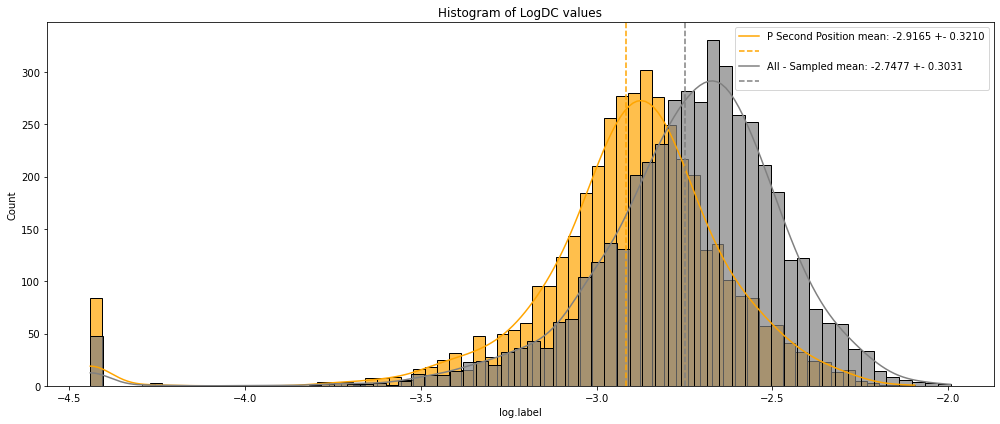

In [91]:
fig_second_position_p = hist_logdc_plot([p_second_pos, dfvz_compact.sample(4500)], ['P Second Position', 'All - Sampled'], colors=['orange', 'gray'])
fig_second_position_p.savefig('fig_second_position_p.png')

In [92]:
p_starting_unfiltered = dfvz[dfvz['seq'].str.startswith('P')][['seq','log.label']]

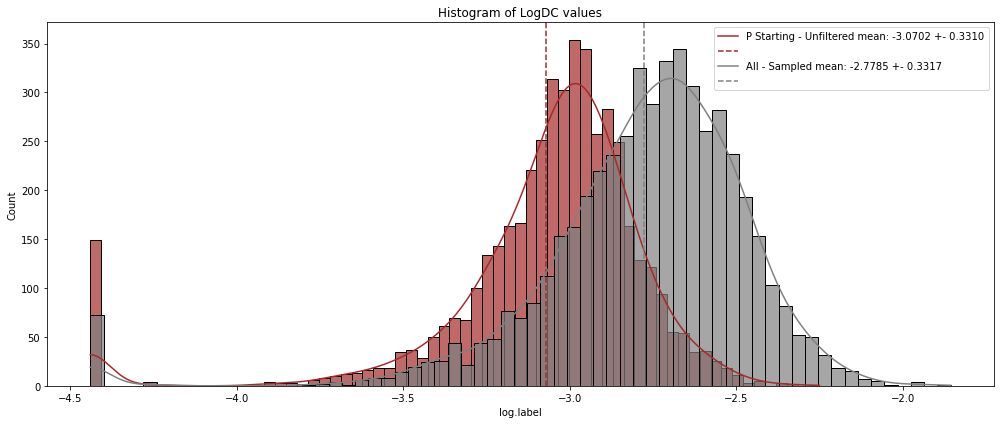

In [93]:
fig_starting_p_unfiltered = hist_logdc_plot([p_starting_unfiltered, dfvz.sample(5000)], ['P Starting - Unfiltered', 'All - Sampled'], colors=['brown', 'gray'])
fig_starting_p_unfiltered.savefig('fig_starting_p_unfiltered.png')

In [94]:
p_starting_unfiltered[p_starting_unfiltered['log.label'] < -4.0]

,seq,log.label
66271,PILA,-4.439897
66272,PDAH,-4.439897
66274,PLFH,-4.439897
66275,PNGH,-4.439897
66277,PVTN,-4.439897
...,...,...
67207,PDHN,-4.439897
67208,PFKS,-4.439897
67209,PTRK,-4.263806
67210,PYWR,-4.439897


In [95]:
p_starting_unfiltered

,seq,log.label
25,PQQS,-2.874385
78,PGGT,-3.068264
128,PRQA,-2.786004
139,PMTP,-3.065926
151,PIWP,-3.019857
...,...,...
67207,PDHN,-4.439897
67208,PFKS,-4.439897
67209,PTRK,-4.263806
67210,PYWR,-4.439897


In [96]:
p_contain_unfiltered = dfvz[dfvz['seq'].str.contains('P')]

In [97]:
p_contain_unfiltered[p_contain_unfiltered['log.label'] < -4.3]

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
66268,GTKP,0.000036,-4.439897,2.23,-5.36,0.30,0.92,-2.09,-1.40,2.84,...,1.63,0.13,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66270,MPRG,0.000036,-4.439897,-2.49,-0.27,-0.41,-1.22,0.88,2.23,2.88,...,1.30,0.83,-0.20,-1.53,-2.63,2.28,-0.53,-1.18,2.01,-1.34
66271,PILA,0.000036,-4.439897,-1.22,0.88,2.23,-4.44,-1.68,-1.03,-4.19,...,0.08,-0.62,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
66272,PDAH,0.000036,-4.439897,-1.22,0.88,2.23,3.64,1.13,2.36,0.07,...,0.36,-0.48,-0.43,-0.25,0.37,0.19,0.51,1.28,0.93,0.65
66274,PLFH,0.000036,-4.439897,-1.22,0.88,2.23,-4.19,-1.03,-0.98,-4.92,...,-1.33,-0.20,-0.43,-0.25,0.37,0.19,0.51,1.28,0.93,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67207,PDHN,0.000036,-4.439897,-1.22,0.88,2.23,3.64,1.13,2.36,2.41,...,0.93,0.65,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
67208,PFKS,0.000036,-4.439897,-1.22,0.88,2.23,-4.92,1.30,0.45,2.84,...,1.63,0.13,-0.67,-0.86,-1.07,-0.41,-0.32,0.27,-0.64,0.11
67210,PYWR,0.000036,-4.439897,-1.22,0.88,2.23,-1.39,2.32,0.01,-4.75,...,-1.01,-0.85,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83
67217,SEPE,0.000036,-4.439897,1.96,-1.63,0.57,3.08,0.39,-0.07,-1.22,...,-0.19,3.56,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02


In [98]:
dfvz.sort_values(inplace=True, by=['log.label'], ascending=True)

In [99]:
unfiltered_bottom_5 = dfvz.iloc[:int(len(dfvz)*0.05), :]

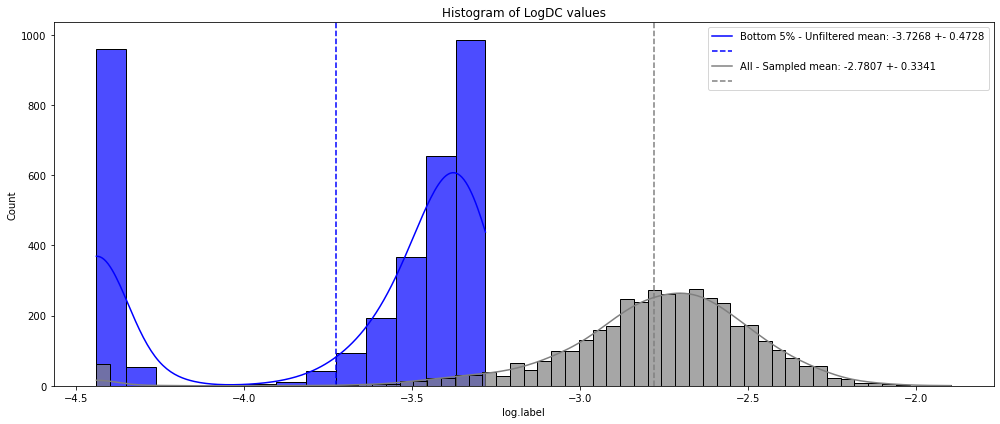

In [100]:
bot_5_hist_unfiltered = hist_logdc_plot([unfiltered_bottom_5, dfvz.sample(4000)], ['Bottom 5% - Unfiltered', 'All - Sampled'], colors=['blue', 'gray'])
bot_5_hist_unfiltered.savefig('bot_5_hist_unfiltered.png')

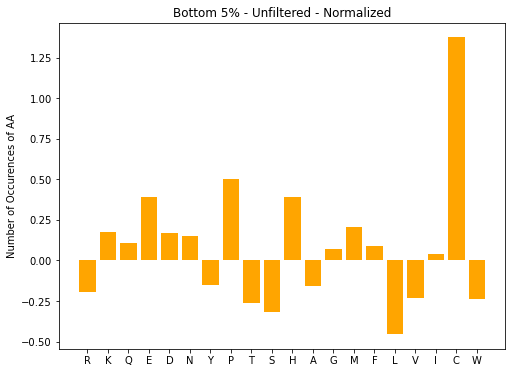

In [101]:
bottom_5_unfiltered_aa_distrib = aa_distrib_plotter([unfiltered_bottom_5], ['Bottom 5% - Unfiltered - Normalized'],  normalize_base=True,base_df=dfvz)

bottom_5_unfiltered_aa_distrib.savefig('bottom_5_unfiltered_aa_distrib.png')

In [107]:
dfvz_filtered.sort_values(inplace=True, by=['log.label'], ascending=True)

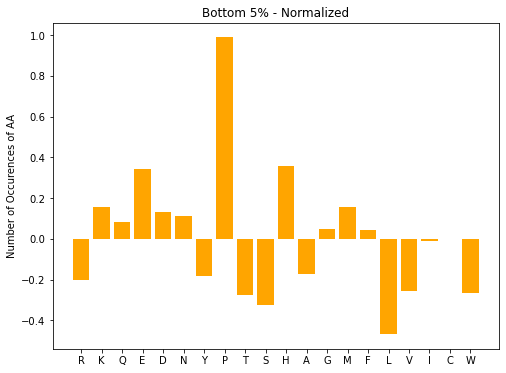

In [108]:
bottom_5 = dfvz_filtered.iloc[:int(len(dfvz_filtered)*0.05), :]
bottom_5_aa_distrib = aa_distrib_plotter([unfiltered_bottom_5], ['Bottom 5% - Normalized'],  normalize_base=True,base_df=dfvz_filtered)

bottom_5_aa_distrib.savefig('bottom_5_aa_distrib.png')

In [109]:
bottom_5['log.label'].mean()

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
66987,YADS,0.000036,-4.439897,-1.39,2.32,0.01,0.07,-1.73,0.09,3.64,...,0.03,0.56,-0.67,-0.86,-1.07,-0.41,-0.32,0.27,-0.64,0.11
66608,NPWP,0.000036,-4.439897,3.22,1.45,0.84,-1.22,0.88,2.23,-4.75,...,-1.01,-0.85,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66607,NNLM,0.000036,-4.439897,3.22,1.45,0.84,3.22,1.45,0.84,-4.19,...,0.08,-0.62,1.01,-0.53,0.43,0.00,0.23,0.10,-0.86,-0.68
66822,KHHP,0.000036,-4.439897,2.84,1.41,-3.14,2.41,1.74,1.11,2.41,...,0.93,0.65,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66823,LEQD,0.000036,-4.439897,-4.19,-1.03,-0.98,3.08,0.39,-0.07,2.18,...,-0.20,-0.41,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,MVKW,0.000578,-3.238307,-2.49,-0.27,-0.41,-2.69,-2.53,-1.29,2.84,...,1.63,0.13,1.50,2.06,1.79,0.75,0.75,-0.13,-1.01,-0.85
9406,VPMG,0.000578,-3.238221,-2.69,-2.53,-1.29,-1.22,0.88,2.23,-2.49,...,-0.86,-0.68,-0.20,-1.53,-2.63,2.28,-0.53,-1.18,2.01,-1.34
25048,MLVF,0.000578,-3.238127,-2.49,-0.27,-0.41,-4.19,-1.03,-0.98,-2.69,...,-0.24,-0.03,1.52,0.61,0.96,-0.16,0.25,0.28,-1.33,-0.20
28141,SPRG,0.000578,-3.238115,1.96,-1.63,0.57,-1.22,0.88,2.23,2.88,...,1.30,0.83,-0.20,-1.53,-2.63,2.28,-0.53,-1.18,2.01,-1.34


In [110]:
dfvz_filtered

,seq,label,log.label,z1.1,z1.2,z1.3,z2.1,z2.2,z2.3,z3.1,...,vhse3.7,vhse3.8,vhse4.1,vhse4.2,vhse4.3,vhse4.4,vhse4.5,vhse4.6,vhse4.7,vhse4.8
66987,YADS,0.000036,-4.439897,-1.39,2.32,0.01,0.07,-1.73,0.09,3.64,...,0.03,0.56,-0.67,-0.86,-1.07,-0.41,-0.32,0.27,-0.64,0.11
66608,NPWP,0.000036,-4.439897,3.22,1.45,0.84,-1.22,0.88,2.23,-4.75,...,-1.01,-0.85,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66607,NNLM,0.000036,-4.439897,3.22,1.45,0.84,3.22,1.45,0.84,-4.19,...,0.08,-0.62,1.01,-0.53,0.43,0.00,0.23,0.10,-0.86,-0.68
66822,KHHP,0.000036,-4.439897,2.84,1.41,-3.14,2.41,1.74,1.11,2.41,...,0.93,0.65,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
66823,LEQD,0.000036,-4.439897,-4.19,-1.03,-0.98,3.08,0.39,-0.07,2.18,...,-0.20,-0.41,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15241,TQYN,0.013500,-1.869657,0.92,-2.09,-1.40,2.18,0.53,-1.14,-1.39,...,-0.96,-0.52,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
49819,WYIP,0.013784,-1.860628,-4.75,3.65,0.85,-1.39,2.32,0.01,-4.44,...,-0.16,-0.13,0.22,-0.17,-0.50,0.05,-0.01,-1.34,-0.19,3.56
45800,WTRH,0.013923,-1.856270,-4.75,3.65,0.85,0.92,-2.09,-1.40,2.88,...,1.30,0.83,-0.43,-0.25,0.37,0.19,0.51,1.28,0.93,0.65
38674,RMPA,0.014294,-1.844837,2.88,2.52,-3.44,-2.49,-0.27,-0.41,-1.22,...,-0.19,3.56,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
